torch.Size([90, 720, 406, 3]) 90


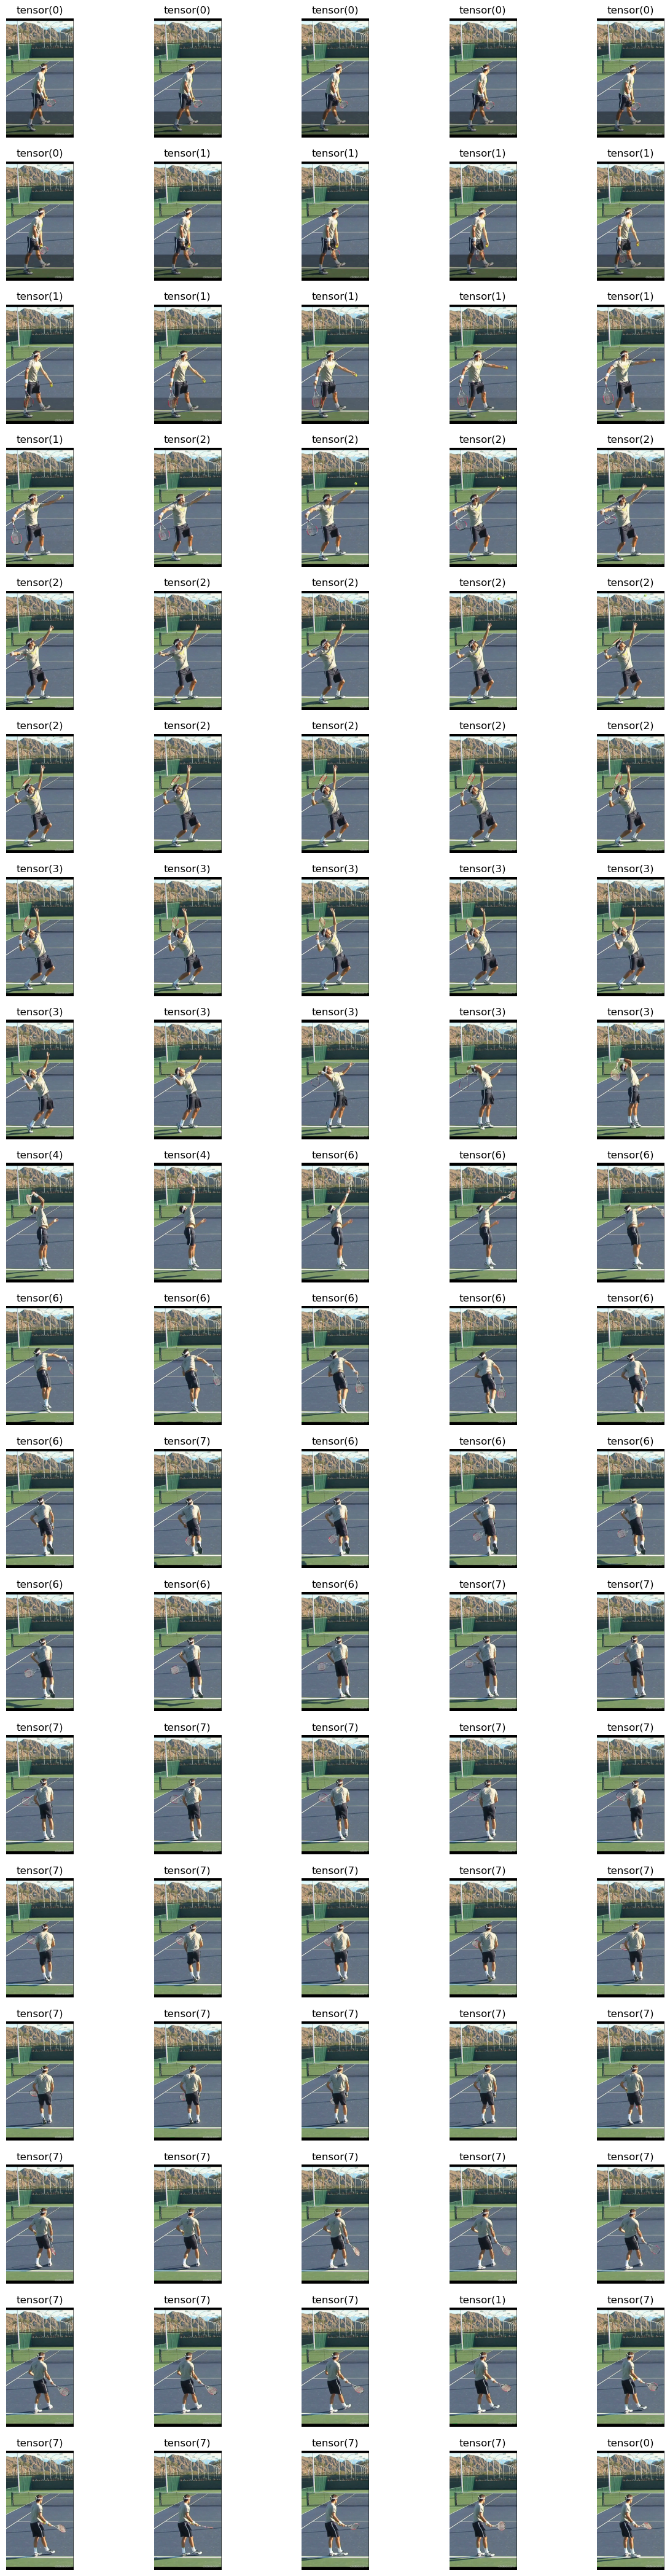

In [5]:
from model import ClassificationNet, VideoProcessor
import matplotlib.pyplot as plt
import torch
model = ClassificationNet()
model.load()
vp = VideoProcessor()
frames, all_landmarks = vp.process("RData/RTennisServes/R0rf1.mp4")
print(frames.shape, len(all_landmarks))
ROWS = 20
COLS = len(frames) // ROWS + 1
plt.figure(figsize=(COLS * 3, ROWS * 3))
for i, (frame, landmarks) in enumerate(zip(frames, all_landmarks)):
    plt.subplot(ROWS, COLS, i + 1)
    plt.imshow(frame)
    clas = model(torch.tensor(landmarks)).argmax()
    plt.title(clas)
    plt.axis("off")